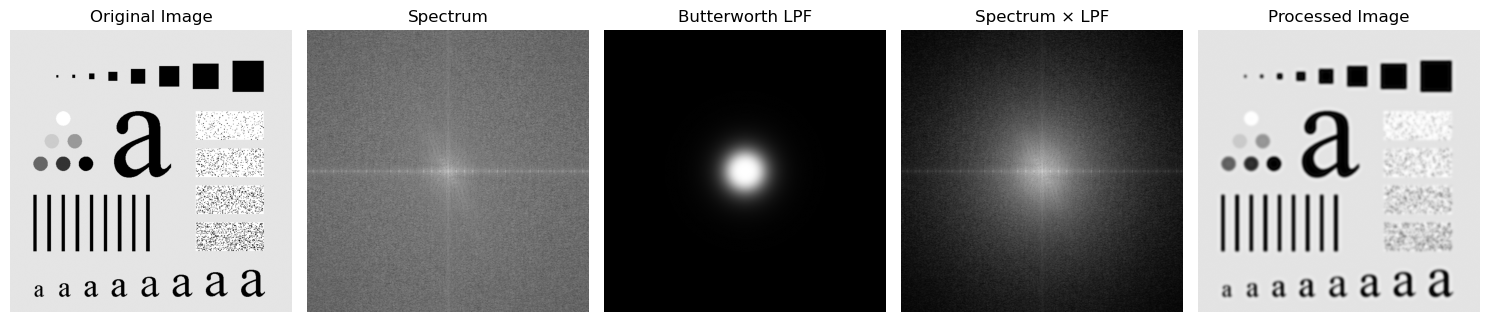

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

# Distance between two points
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Butterworth Low Pass Filter
def butterworth_lpf(D0, shape, n=2):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols))

    for y in range(rows):
        for x in range(cols):
            D = distance((y, x), center)
            filter_mask[y, x] = 1 / (1 + (D/D0)**(2*n))
    return filter_mask

# Main function to apply filter
def apply_butterworth_lpf(image_path, D0):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Fourier Transform
    dft = np.fft.fft2(img_array)
    dft_shift = np.fft.fftshift(dft)

    # Create and apply filter
    lpf = butterworth_lpf(D0, img_array.shape)
    filtered_dft = dft_shift * lpf

    # Inverse Transform
    inv_shift = np.fft.ifftshift(filtered_dft)
    processed_img = np.fft.ifft2(inv_shift)
    processed_img = np.abs(processed_img)

    # Plotting
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 5, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
    plt.title('Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(lpf, cmap='gray')
    plt.title('Butterworth LPF')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(np.log(1 + np.abs(filtered_dft)), cmap='gray')
    plt.title('Spectrum × LPF')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
D0 = 50
apply_butterworth_lpf(image_path, D0)


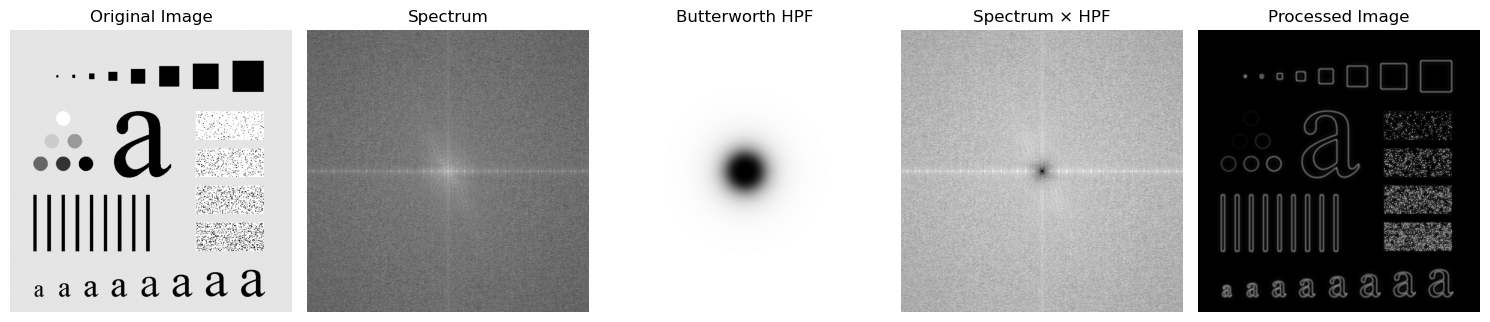

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

# Distance between two points
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Butterworth High Pass Filter
def butterworth_hpf(D0, shape, n=2):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols))

    for y in range(rows):
        for x in range(cols):
            D = distance((y, x), center)
            if D == 0:
                filter_mask[y, x] = 0  # To avoid division by zero
            else:
                filter_mask[y, x] = 1 / (1 + (D0/D)**(2*n))
    return filter_mask

# Main function to apply High Pass Filter
def apply_butterworth_hpf(image_path, D0):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Fourier Transform
    dft = np.fft.fft2(img_array)
    dft_shift = np.fft.fftshift(dft)

    # Create and apply HPF
    hpf = butterworth_hpf(D0, img_array.shape)
    filtered_dft = dft_shift * hpf

    # Inverse Transform
    inv_shift = np.fft.ifftshift(filtered_dft)
    processed_img = np.fft.ifft2(inv_shift)
    processed_img = np.abs(processed_img)

    # Plotting
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 5, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
    plt.title('Spectrum')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(hpf, cmap='gray')
    plt.title('Butterworth HPF')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(np.log(1 + np.abs(filtered_dft)), cmap='gray')
    plt.title('Spectrum × HPF')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
D0 = 50
apply_butterworth_hpf(image_path, D0)
